In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive

## Effect of skin

In [4]:
k = float(input("enter value of reserovir rock permeablity(md): "))
q = float(input("enter value of oil flow(bbl/day): "))
Bo = float(input("enter value of oil formation volume(bbl/day): "))
mu = float(input("enter value of oil viscosity(cp): "))
h = float(input("enter value of thickness of reservoir (ft): "))
pe = float(input("enter value of reservoir boundary pressure(psi): "))
re = float(input("enter outer resrvoir radius(ft): "))
rw = float(input("enter wellbore radius(ft): "))

enter value of reserovir rock permeablity(md): 120
enter value of oil flow(bbl/day): 600
enter value of oil formation volume(bbl/day): 1.25
enter value of oil viscosity(cp): 2.5
enter value of thickness of reservoir (ft): 25
enter value of reservoir boundary pressure(psi): 2500
enter outer resrvoir radius(ft): 745
enter wellbore radius(ft): 0.26


In [5]:
r = np.linspace(rw, re, 8000)

In [6]:
df = pd.DataFrame({"r":r})
df["p"] = pe - ((141.2*q*Bo*mu*np.log(re/df["r"]))/(k*h))

In [7]:
df

,r,p
0,0.260000,1797.489593
1,0.353104,1824.501276
2,0.446208,1845.153789
3,0.539312,1861.877975
4,0.632417,1875.932075
...,...,...
7995,744.627583,2499.955874
7996,744.720688,2499.966907
7997,744.813792,2499.977940
7998,744.906896,2499.988971


In [26]:
def skin_effect(s, rs):
    plt.figure(figsize = (15, 8))
    plt.style.use("fivethirtyeight")
    ks = (k*(np.log(rs/rw))/(s + np.log(rs/rw)))
    t = np.linspace(rw, rs, 1000)
    sf = pd.DataFrame({'t': t})
    sf["q"] = pe - (141.2*q*Bo*mu*(((np.log(re/rs))/k)+(np.log(rs/sf["t"]))/ks))/h
    plt.plot(df["r"], df["p"], c = "b", label = "pressure profile of undamaged well", lw = 3)
    plt.plot(sf["t"], sf["q"], c = "r", label = "pressure profile of damaged well", lw = 3)
    plt.xlim(0.3, 50)
    plt.ylim(1000, 2500)
    plt.xlabel("radius from wellbore")
    plt.ylabel("reservoir pressure")
    plt.legend()
    plt.title("skin and skin zone effect on reservoir pressure drowdown")
    plt.grid(True)

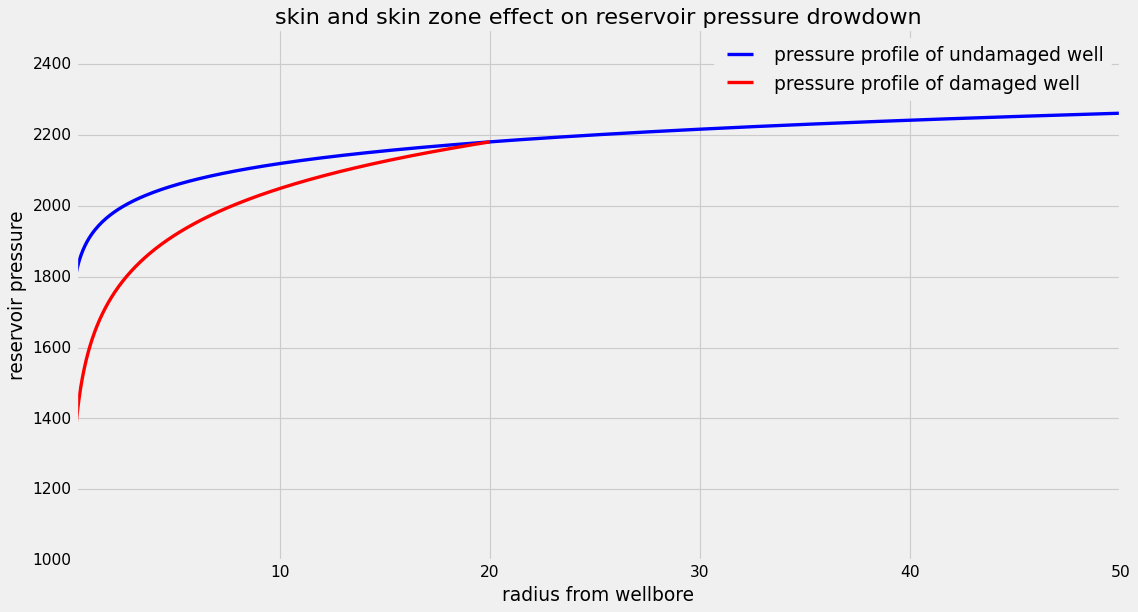

In [27]:
skin_effect(5, 20)

In [28]:
skin_interactive = interactive(skin_effect, s = (-3, 10, 0.2), rs = (0.5, 25, 0.2)) 

In [29]:
skin_interactive

interactive(children=(FloatSlider(value=3.0, description='s', max=10.0, min=-3.0, step=0.2), FloatSlider(value…